# ANÁLISIS EXPLORATORIO

Realizamos EDA con el Dataset_1, al que no se le ha eliminado tableros negros en 2022, u outro tipo de casuística que se estudia aquí.

Importación de librerías y datos.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_csv('../Datasets/Dataset_1.csv',index_col='fecha')
df = df.sort_index()
df.index = pd.to_datetime(df.index)
df = df.drop(['CurvaCola','Negro','ComisionActualProductoCodigo', 'ComisionActualNetoEspesor'],axis=1)

Eliminamos valores fuera del rango intercuartílico (0.01-0.99):

In [3]:
Q1 = df.quantile(0.01)
Q3 = df.quantile(0.99)

df = df[~((df < Q1) |(df > Q3)).any(axis=1)]

## Análisis multivariable

Leemos las variables de las que disponemos e imprimos el principio y final del dataset.

In [4]:
columnas_iniciales = df.columns.values
columnas_iniciales

array(['FormacionNIRHumedadPV', 'FibraticPredNIRHumedadPV', 'Hum_Pred',
       'Etapa2MWHumedadPV', 'ExtractorVelocidadPV',
       'FormacionAlturaMantaPV', 'FormadoraVelocidadPV',
       'FormadoraSiloNivel', 'SiloFibraNivel', 'SiloFibraVelocidadPV',
       'SiloRechazosNivelPV', 'SiloRechazosVelocidadPV', 'SierrasAnchoPV',
       'ScalperPosPV', 'ScalperReservaMediaPV', 'ScalperReservaDerPosPV',
       'ScalperReservaIzqPosPV', 'FormacionNIRPH',
       'FormacionNIRHumedadPV_std', 'FibraticPredNIRHumedadPV_std',
       'Hum_Pred_std', 'Etapa2MWHumedadPV_std'], dtype=object)

In [5]:
df.head(2)

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,SierrasAnchoPV,ScalperPosPV,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std
fecha,,,,,,,,,,,,,,,,,,,,,
2021-02-01 00:00:00,9.46,NaN,11.07158,14.48314,67.98827,74.61499,57.2,29.99925,39.99929,35.0,...,2397.86,225.38,62.726620,62.726620,62.726620,4.94,0.025309,NaN,0.074307,0.105170
2021-02-01 00:01:00,9.68,NaN,10.99297,14.34745,68.00867,77.92999,58.8,29.99925,39.99929,35.0,...,2238.55,224.58,61.335415,61.335415,61.335415,4.94,0.096250,NaN,0.075515,0.164258


In [6]:
df.tail(2)

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,SierrasAnchoPV,ScalperPosPV,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std
fecha,,,,,,,,,,,,,,,,,,,,,
2022-02-28 23:58:00,7.039144,6.815112,7.510016,9.477647,76.056065,123.675,62.7,84.99747,39.99929,27.9,...,2143.31,425.9625,66.44578,66.44578,66.44578,5.490692,0.021746,0.009964,0.053765,0.119796
2022-02-28 23:59:00,6.959725,6.793396,7.683909,9.848627,76.163620,123.675,62.9,84.99747,39.99929,26.2,...,2143.31,428.0050,64.81602,64.81602,64.81602,5.490753,0.021103,0.009597,0.055660,0.125093


Comprobamos los valores nulos que hai en cada fila.

In [7]:
df.isnull().sum()

FormacionNIRHumedadPV              0
FibraticPredNIRHumedadPV        8790
Hum_Pred                           0
Etapa2MWHumedadPV                  0
ExtractorVelocidadPV               0
FormacionAlturaMantaPV             0
FormadoraVelocidadPV               0
FormadoraSiloNivel                 0
SiloFibraNivel                     0
SiloFibraVelocidadPV               0
SiloRechazosNivelPV                0
SiloRechazosVelocidadPV            0
SierrasAnchoPV                     0
ScalperPosPV                       0
ScalperReservaMediaPV              0
ScalperReservaDerPosPV             0
ScalperReservaIzqPosPV             0
FormacionNIRPH                     0
FormacionNIRHumedadPV_std       1013
FibraticPredNIRHumedadPV_std    9803
Hum_Pred_std                    1013
Etapa2MWHumedadPV_std           1013
dtype: int64

Comprobamos cuántos valores hai menores que cero por columna.

In [8]:
df[df<0].count()

FormacionNIRHumedadPV           0
FibraticPredNIRHumedadPV        0
Hum_Pred                        0
Etapa2MWHumedadPV               0
ExtractorVelocidadPV            0
FormacionAlturaMantaPV          0
FormadoraVelocidadPV            0
FormadoraSiloNivel              0
SiloFibraNivel                  0
SiloFibraVelocidadPV            0
SiloRechazosNivelPV             0
SiloRechazosVelocidadPV         0
SierrasAnchoPV                  0
ScalperPosPV                    0
ScalperReservaMediaPV           0
ScalperReservaDerPosPV          0
ScalperReservaIzqPosPV          0
FormacionNIRPH                  0
FormacionNIRHumedadPV_std       0
FibraticPredNIRHumedadPV_std    0
Hum_Pred_std                    0
Etapa2MWHumedadPV_std           0
dtype: int64

Principales medidas estadísticas.

In [9]:
df.describe()

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,SierrasAnchoPV,ScalperPosPV,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std
count,424012.000000,415222.000000,424012.000000,424012.000000,424012.000000,424012.000000,424012.000000,424012.000000,424012.000000,424012.000000,...,424012.000000,424012.000000,424012.000000,424012.000000,424012.000000,424012.000000,422999.000000,414209.000000,422999.000000,422999.000000
mean,7.950675,7.421935,9.541081,11.819917,60.434119,185.271494,47.687622,75.269594,41.766311,24.526366,...,2270.192547,392.109215,64.576450,64.576456,64.576456,4.910735,0.034407,0.021909,0.096481,0.232124
std,2.693282,1.979769,3.003296,3.474788,20.125479,141.601865,16.077797,18.430736,21.841927,8.765658,...,195.812403,117.813420,8.149996,8.149996,8.149997,1.640108,0.037252,0.024931,0.077156,0.211978
min,0.000000,0.000000,0.000000,0.000000,0.000000,60.465030,0.000000,0.001772,0.000000,0.000000,...,1873.870000,184.780000,35.134770,35.134770,35.134770,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,6.637693,9.031612,11.655295,54.779865,101.595000,42.400000,79.997550,19.990360,20.700000,...,2142.600000,294.275000,60.255984,60.255984,60.255984,5.170000,0.010600,0.006773,0.053559,0.104553
50%,8.650000,7.784733,10.266000,12.750200,66.475605,127.500000,51.300000,79.998730,39.999290,25.400000,...,2145.820000,391.434950,65.184170,65.184170,65.184170,5.480000,0.023305,0.014641,0.078925,0.177841
75%,9.263516,8.690204,11.243300,13.606080,73.548310,195.021250,57.800000,84.996820,59.995940,30.800000,...,2491.330000,464.615000,70.297667,70.297611,70.297611,5.610000,0.045419,0.028063,0.118916,0.294345
max,11.555640,12.311970,18.727480,15.773140,83.663670,625.650000,70.200000,99.290330,100.003000,35.000000,...,2547.520000,749.097450,80.904880,80.904880,80.904880,6.054287,0.287974,0.204990,0.896359,1.953302


Matriz de correlación y mapa de calor de la tabla.

In [10]:
df.corr()

,FormacionNIRHumedadPV,FibraticPredNIRHumedadPV,Hum_Pred,Etapa2MWHumedadPV,ExtractorVelocidadPV,FormacionAlturaMantaPV,FormadoraVelocidadPV,FormadoraSiloNivel,SiloFibraNivel,SiloFibraVelocidadPV,...,SierrasAnchoPV,ScalperPosPV,ScalperReservaMediaPV,ScalperReservaDerPosPV,ScalperReservaIzqPosPV,FormacionNIRPH,FormacionNIRHumedadPV_std,FibraticPredNIRHumedadPV_std,Hum_Pred_std,Etapa2MWHumedadPV_std
FormacionNIRHumedadPV,1.000000,0.326667,0.456459,0.528531,0.593750,-0.381296,0.611916,0.419787,0.267345,0.438524,...,0.019639,-0.041720,0.217003,0.217003,0.217003,0.854857,0.306966,0.080777,0.123400,0.045845
FibraticPredNIRHumedadPV,0.326667,1.000000,0.604556,0.507846,0.595143,-0.274492,0.517283,0.308343,0.217607,0.371027,...,0.066529,-0.082681,0.154799,0.154799,0.154799,0.202310,0.107380,0.139101,0.002753,-0.012865
Hum_Pred,0.456459,0.604556,1.000000,0.884467,0.816653,-0.447928,0.724164,0.579914,0.352970,0.509068,...,-0.014804,-0.070044,0.421658,0.421657,0.421657,0.342531,0.153920,0.133612,0.220287,0.122235
Etapa2MWHumedadPV,0.528531,0.507846,0.884467,1.000000,0.825491,-0.499015,0.737241,0.591500,0.353976,0.529571,...,-0.003175,-0.052218,0.426531,0.426531,0.426531,0.426814,0.177244,0.112087,0.228102,0.155897
ExtractorVelocidadPV,0.593750,0.595143,0.816653,0.825491,1.000000,-0.500327,0.848460,0.550466,0.364016,0.649731,...,0.154941,-0.150983,0.288348,0.288347,0.288347,0.481526,0.214830,0.109241,0.211273,0.064780
FormacionAlturaMantaPV,-0.381296,-0.274492,-0.447928,-0.499015,-0.500327,1.000000,-0.498037,-0.362022,-0.185318,-0.378079,...,-0.029500,0.205571,-0.194032,-0.194032,-0.194032,-0.329976,-0.101017,-0.045768,-0.133613,-0.059857
FormadoraVelocidadPV,0.611916,0.517283,0.724164,0.737241,0.848460,-0.498037,1.000000,0.521969,0.391256,0.635945,...,-0.033719,-0.186938,0.315786,0.315786,0.315786,0.530207,0.225828,0.119769,0.175615,0.058955
FormadoraSiloNivel,0.419787,0.308343,0.579914,0.591500,0.550466,-0.362022,0.521969,1.000000,0.459535,0.222204,...,-0.074260,-0.010820,0.494871,0.494870,0.494870,0.373214,0.100029,0.093870,0.168002,0.104342
SiloFibraNivel,0.267345,0.217607,0.352970,0.353976,0.364016,-0.185318,0.391256,0.459535,1.000000,-0.095471,...,-0.057558,0.082663,0.209101,0.209100,0.209100,0.268529,0.005918,0.070430,0.092408,0.037441
SiloFibraVelocidadPV,0.438524,0.371027,0.509068,0.529571,0.649731,-0.378079,0.635945,0.222204,-0.095471,1.000000,...,0.197569,-0.146430,0.161463,0.161462,0.161462,0.360983,0.224948,0.072935,0.145327,0.073871


<AxesSubplot:>

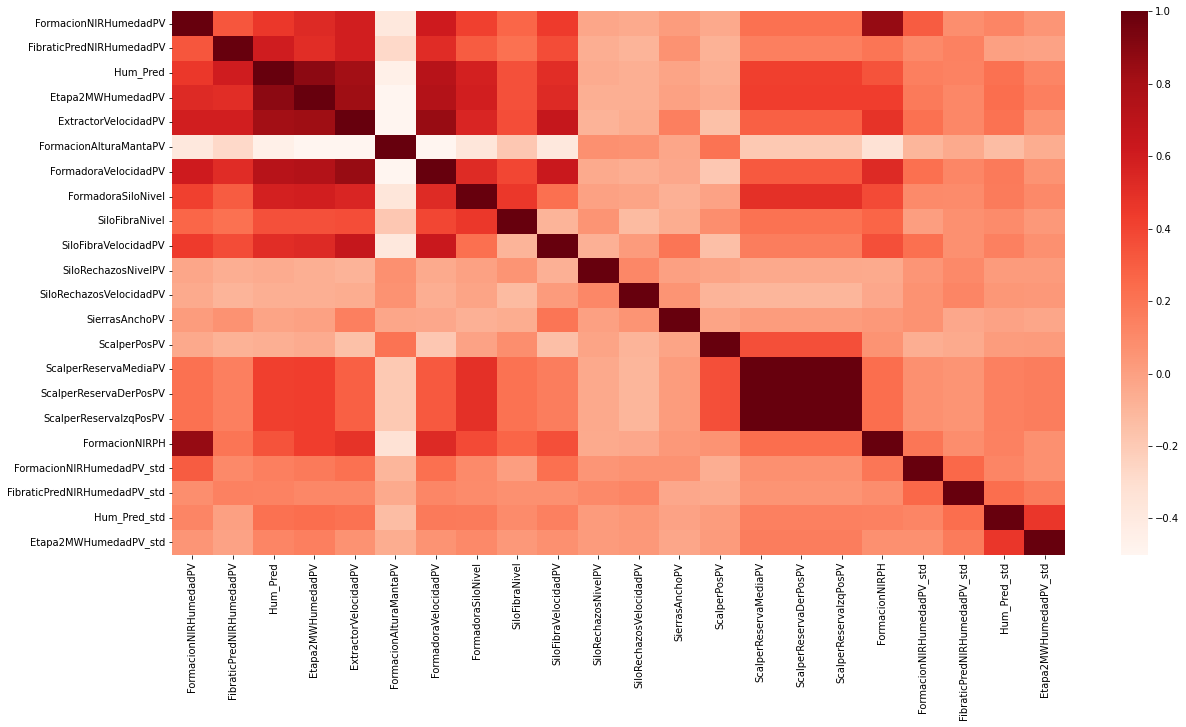

In [11]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), cmap = 'Reds',ax=ax)

Principales gráficos.

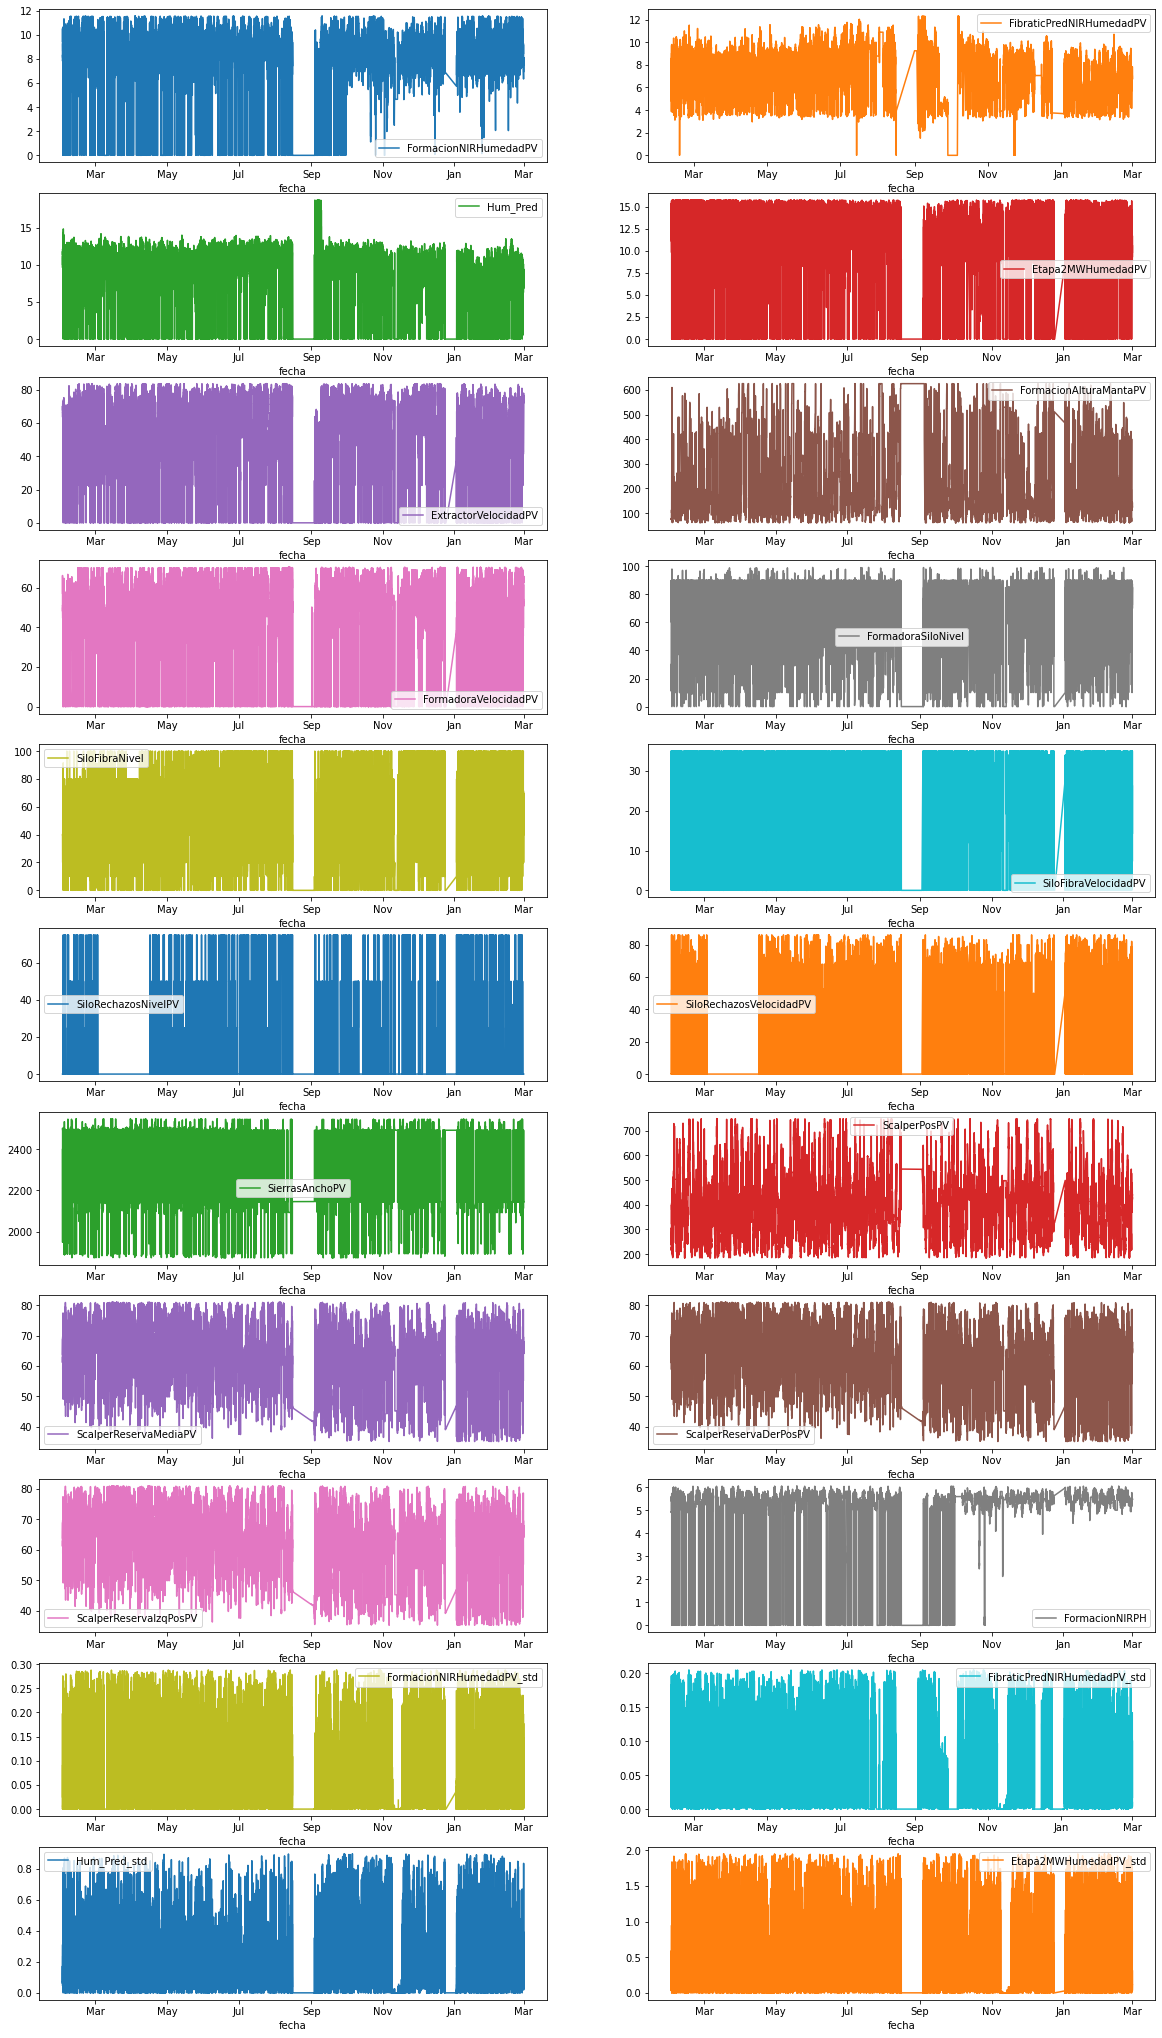

In [12]:
date_form = DateFormatter("%b")

ax = df.plot(layout=(12,2),figsize=(20,40),subplots=True,sharex=False)

for i in range(12):
    for j in range(2):
        ax[i,j].xaxis.set_major_formatter(date_form)

plt.show()

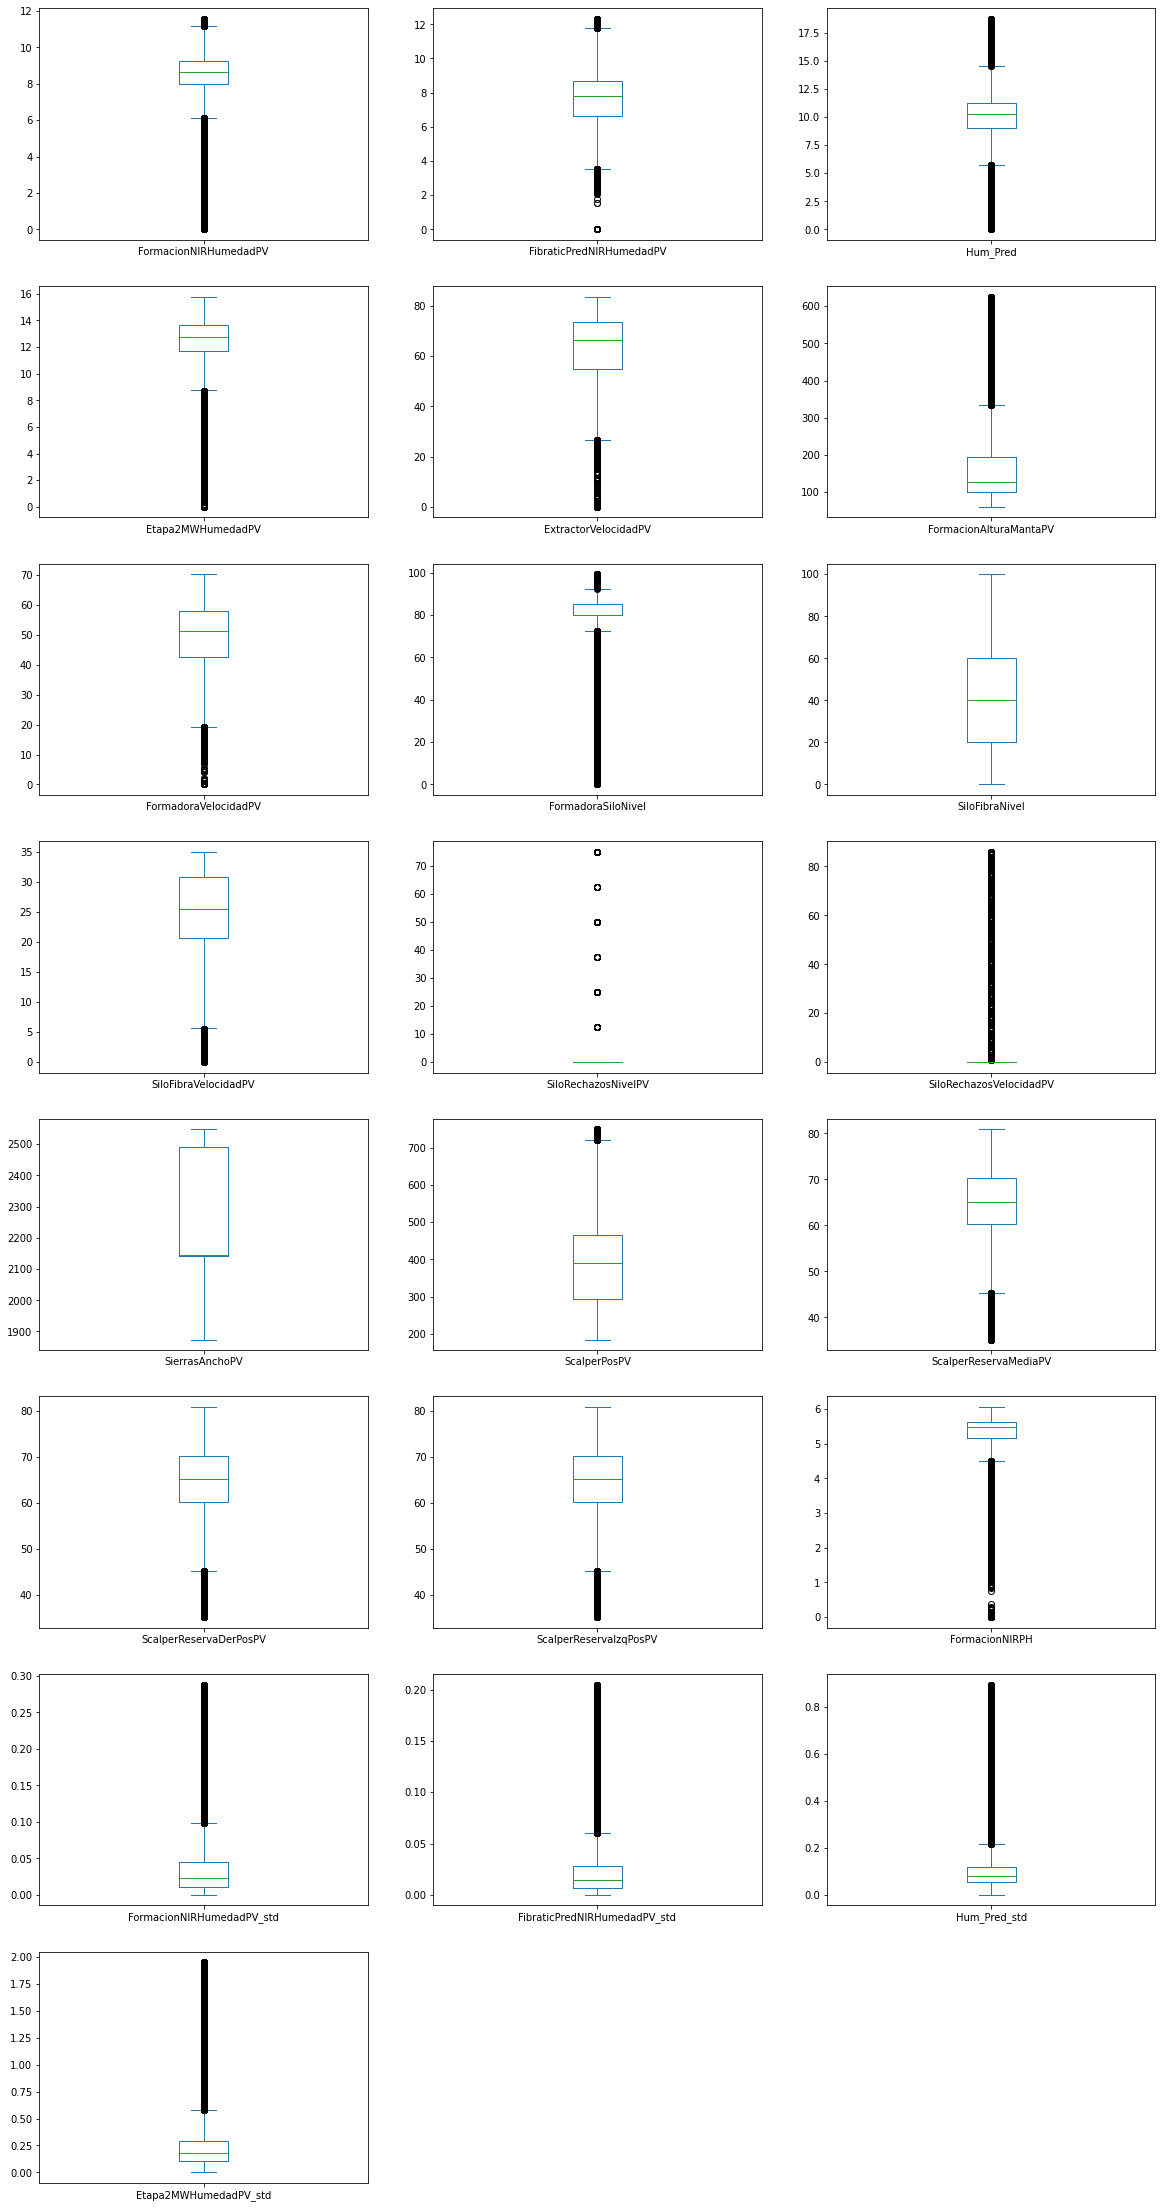

In [13]:
df.plot.box(subplots=True,layout=(8,3),figsize=(20,40))
plt.show()

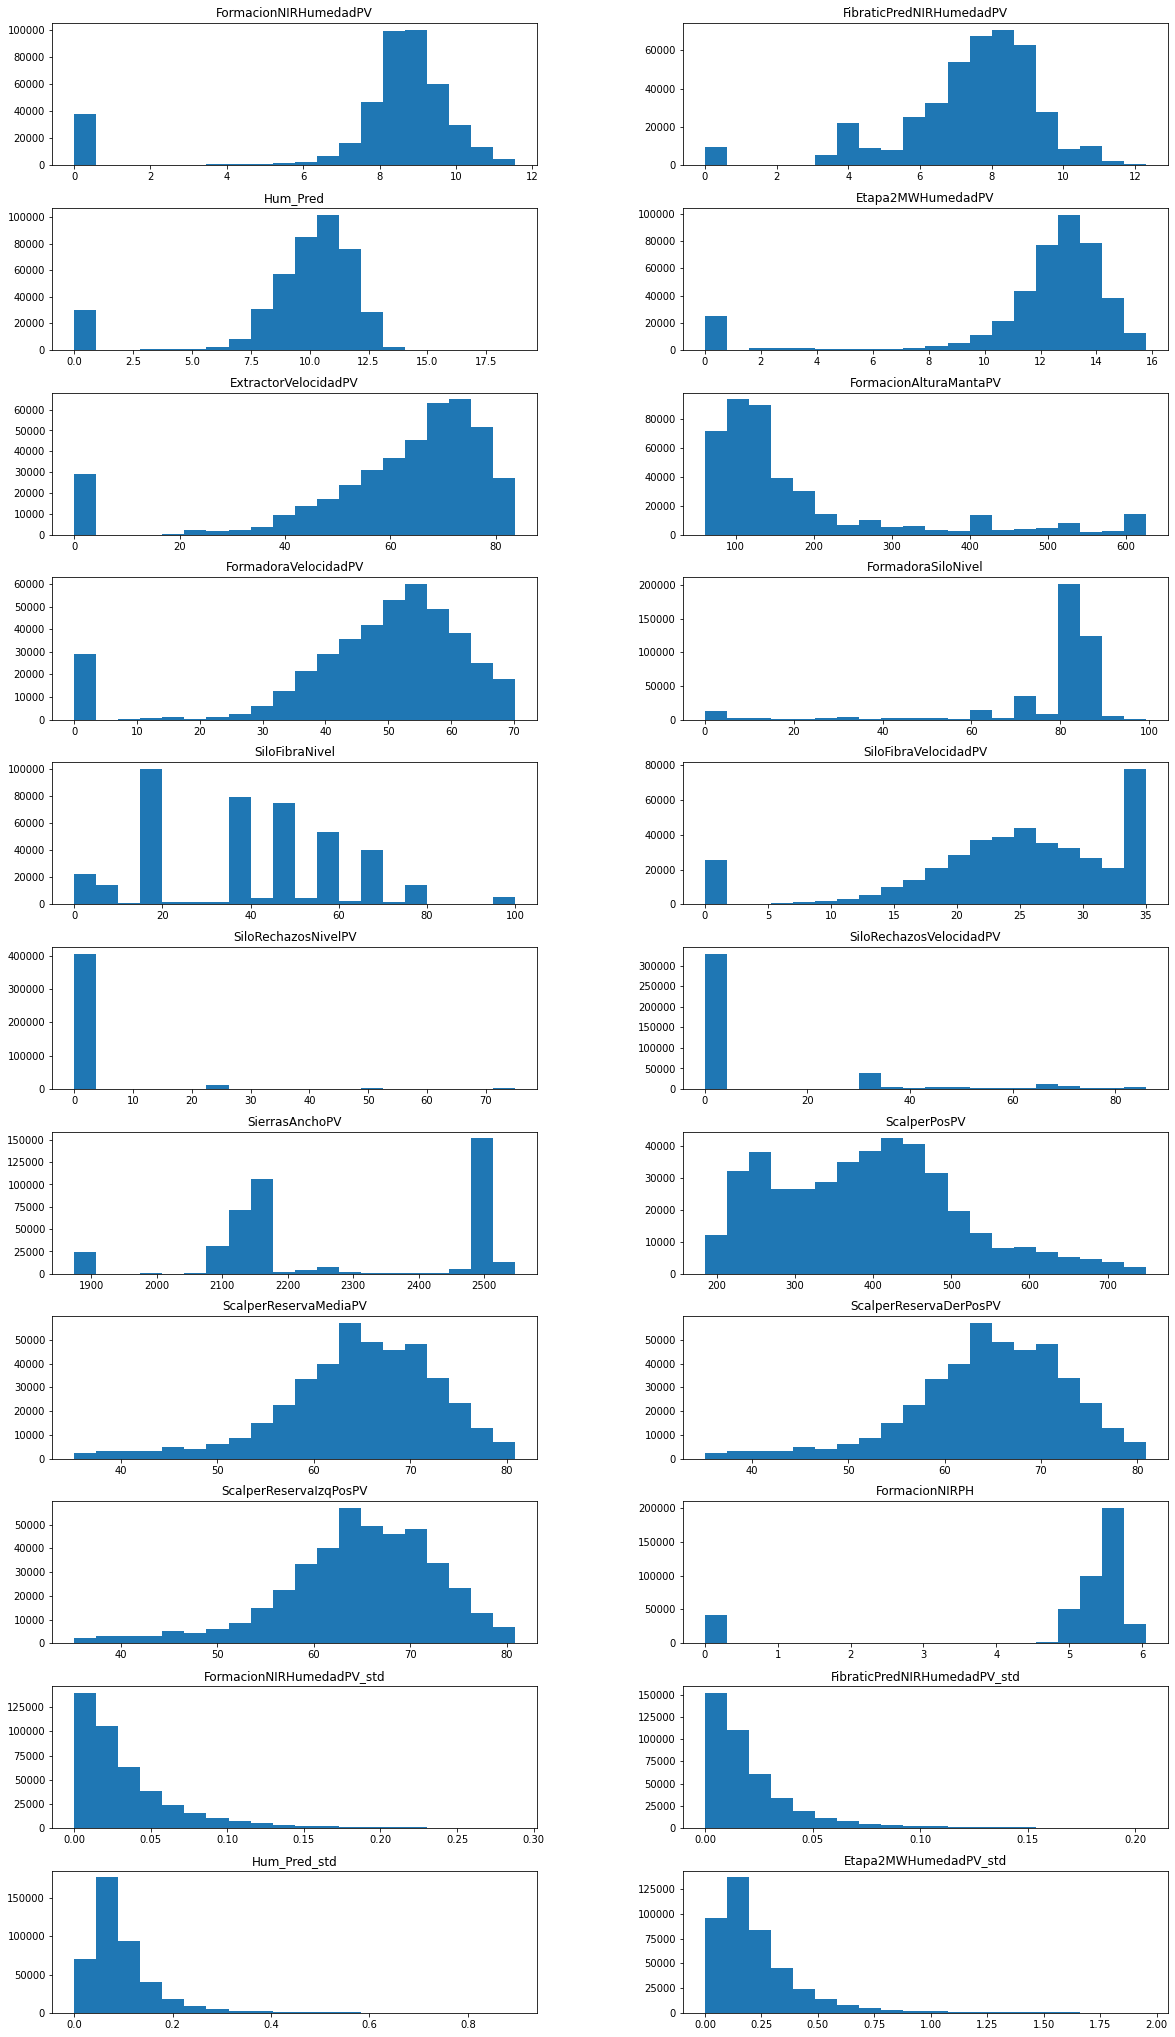

In [14]:
df.hist(bins=20,layout=(12,2),figsize=(20,40),grid=False)
plt.show()

# Conclusiones

- Faltan valores fibratic

- Hay valores negativos

- Salto importante en hum_nir_pred

- Histograma interesante de Hum_Pred,FormadoraVelocidadPV,SiloFibraVelocidadPV

- ScalperPosPV para parada, sí?

- FormadoraVelocidadPV mejor criterio de Planta Parada?

# ExtractorVelocidadPV

Análisis de extractorvelocidadpv para ver donde establecer los criterios de planta parada.

In [15]:
df['ExtractorVelocidadPV'].describe()

count    424012.000000
mean         60.434119
std          20.125479
min           0.000000
25%          54.779865
50%          66.475605
75%          73.548310
max          83.663670
Name: ExtractorVelocidadPV, dtype: float64

<AxesSubplot:>

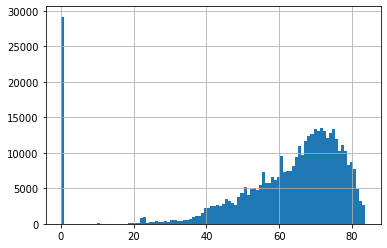

In [16]:
df[df['ExtractorVelocidadPV']<200]['ExtractorVelocidadPV'].hist(bins=100)

Como vemos, la mayoría de valores están entre 20 y 90. Por lo tanto, se filtrarán a partir de 20 hasta 200, ya que no hay valores tan altos. Vamos  a contar aquellos fuera del rango.

In [17]:
df[(df['ExtractorVelocidadPV']>200)|(df['ExtractorVelocidadPV']<20)]['ExtractorVelocidadPV'].count()

29545

# Extracciones

In [18]:
df = df.loc[:,['FormacionNIRHumedadPV', 'FibraticPredNIRHumedadPV', 'Etapa2MWHumedadPV', 'Hum_Pred',
        'ExtractorVelocidadPV', 'FormacionAlturaMantaPV',
       'FormadoraVelocidadPV', 'FormadoraSiloNivel', 'SiloFibraNivel',
       'SiloFibraVelocidadPV', 'SiloRechazosNivelPV',
       'SiloRechazosVelocidadPV', 'SierrasAnchoPV', 'ScalperPosPV',
       'ScalperReservaMediaPV', 'ScalperReservaDerPosPV',
       'ScalperReservaIzqPosPV', 'FormacionNIRPH', 'FormacionNIRHumedadPV_std',
       'FibraticPredNIRHumedadPV_std', 'Hum_Pred_std',
       'Etapa2MWHumedadPV_std']]

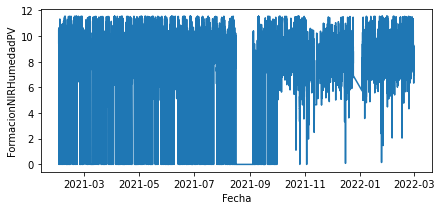

In [19]:
fig = plt.figure(figsize=(7,3))
plt.plot(df.index,df.FormacionNIRHumedadPV)
plt.ylabel('FormacionNIRHumedadPV')
plt.xlabel('Fecha')
plt.show()

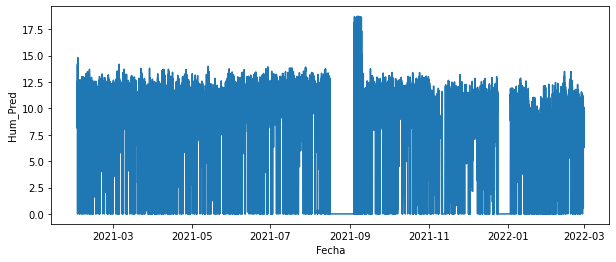

In [23]:
date_form = DateFormatter("%b")


fig = plt.figure(figsize=(10,4))
plt.plot(df.index,df.loc[:,'Hum_Pred'])
plt.ylabel('Hum_Pred')
plt.xlabel('Fecha')
plt.show()

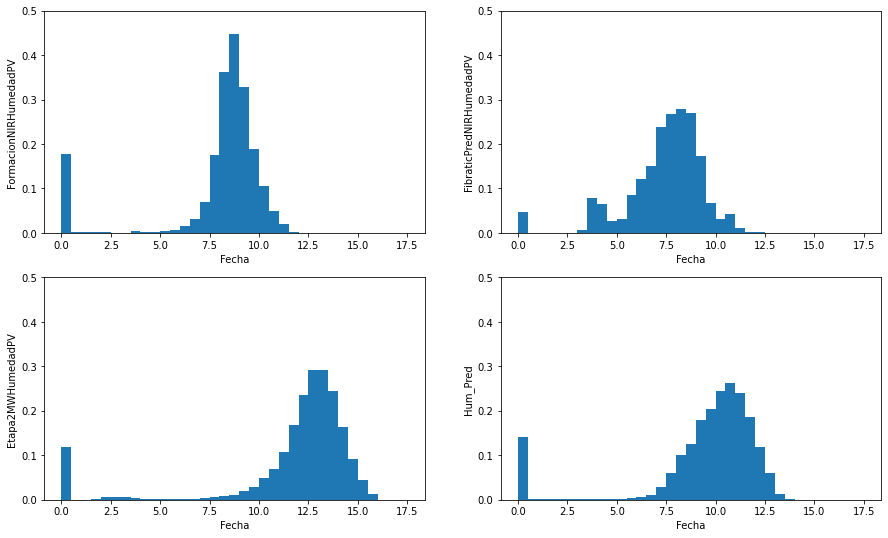

In [21]:
import numpy as np
date_form = DateFormatter("%b")

#ax = df.iloc[:,0:4].plot(layout=(2,2),figsize=(15,7),subplots=True)
bins = np.arange(0,18,0.5)
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,9))
contador=0
for i in range(2):
    for j in range(2):
        ax[i,j].hist(df.iloc[:,contador],density=True, bins=bins)
        ax[i,j].set_ylim([0,0.5])
        ax[i,j].set_ylabel(df.columns[contador])
        ax[i,j].set_xlabel('Fecha')
        contador+=1
plt.show()

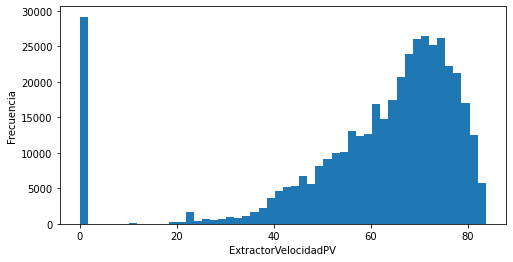

In [22]:
fig = plt.figure(figsize=(8,4))
plt.hist(df.ExtractorVelocidadPV,bins=50)
plt.ylabel('Frecuencia')
plt.xlabel('ExtractorVelocidadPV')
plt.show()